# Linear Regression
____

#### Libraries
____

In [694]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import statsmodels.formula.api as sm
import pickle

%matplotlib inline

#### Load dataset
___

In [695]:
dataset = 'data/com.csv'
columns = ['ptype', 'floora_plan', 'year', 'occ', 'site_EUI', 'n_site_gas','n_site_elec', 'water_use']

# columns = ['ptype', 'year', 'occ','site_EUI', 'n_site_gas','n_site_elec','water_use']
building = pd.read_csv(dataset, sep=',', usecols=columns)

building = building[(building != 0).all(1)]
building.head(5)

,ptype,floora_plan,year,occ,site_EUI,n_site_gas,n_site_elec,water_use
0,Multifamily,412503.0,1903,100,32.0,20472.0,3249755.2,22061.0
1,General Medical,567517.0,1950,100,352.7,1255514.1,18295844.6,9574.0
2,Multifamily,321464.0,1939,100,76.2,8906.3,1121931.8,5915.6
3,Multifamily,54913.0,1911,100,17.9,601.0,262377.2,231.9
4,Multifamily,535632.0,1964,100,115.9,631631.4,1620.0,8984.2


In [696]:
building.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6449 entries, 0 to 6528
Data columns (total 8 columns):
ptype          6449 non-null object
floora_plan    6449 non-null float64
year           6449 non-null int64
occ            6449 non-null int64
site_EUI       6449 non-null float64
n_site_gas     6449 non-null float64
n_site_elec    6449 non-null float64
water_use      6449 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 453.4+ KB


In [697]:
building.describe()

,floora_plan,year,occ,site_EUI,n_site_gas,n_site_elec,water_use
count,6.449000e+03,6449.000000,6449.000000,6449.000000,6.449000e+03,6.449000e+03,6.449000e+03
mean,1.367164e+05,1949.632036,99.317724,262.949884,1.498865e+05,1.462108e+06,1.609998e+04
std,1.710561e+05,30.898080,3.950845,10965.069312,6.659767e+06,9.344539e+06,1.579409e+05
min,5.000000e+02,1649.000000,5.000000,2.100000,3.000000e-01,4.400000e+01,1.000000e-01
25%,6.462200e+04,1927.000000,100.000000,64.600000,1.324140e+04,2.889300e+05,2.735300e+03
50%,8.701600e+04,1941.000000,100.000000,79.300000,4.429540e+04,4.860384e+05,4.816000e+03
75%,1.387270e+05,1967.000000,100.000000,96.800000,7.183580e+04,1.057218e+06,8.033300e+03
max,2.376683e+06,2019.000000,100.000000,869265.000000,5.344590e+08,4.520236e+08,6.594604e+06


#### Data cleanup
___

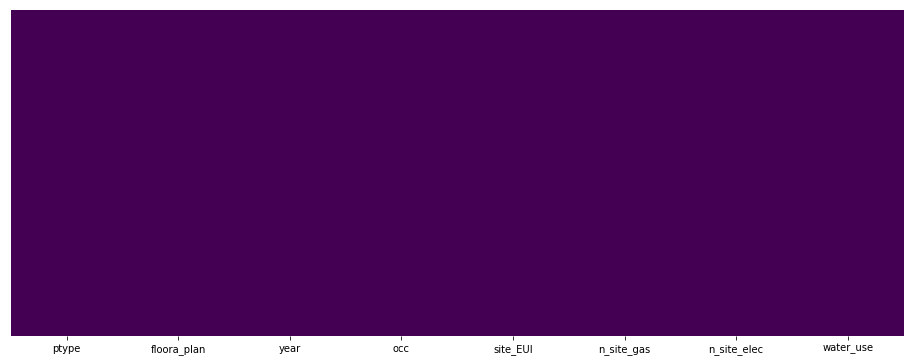

In [698]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# plt.show()

In [699]:
building.dropna(axis='columns', how='all', inplace=True)
building.dropna(inplace=True)
building.head()

,ptype,floora_plan,year,occ,site_EUI,n_site_gas,n_site_elec,water_use
0,Multifamily,412503.0,1903,100,32.0,20472.0,3249755.2,22061.0
1,General Medical,567517.0,1950,100,352.7,1255514.1,18295844.6,9574.0
2,Multifamily,321464.0,1939,100,76.2,8906.3,1121931.8,5915.6
3,Multifamily,54913.0,1911,100,17.9,601.0,262377.2,231.9
4,Multifamily,535632.0,1964,100,115.9,631631.4,1620.0,8984.2


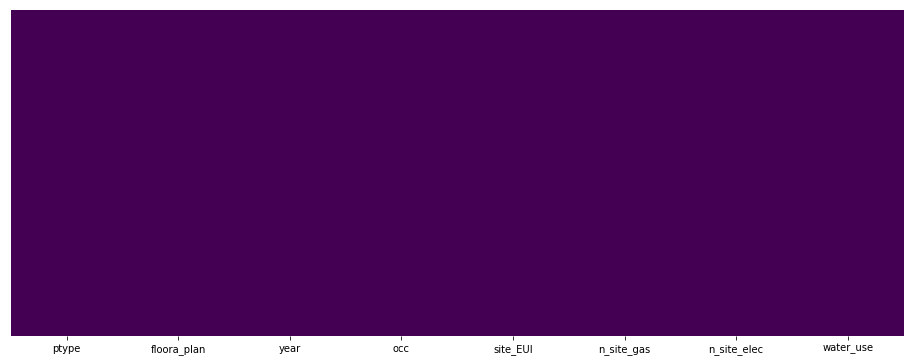

In [700]:
plt.figure(figsize=(16,6))

sns.heatmap(building.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# plt.show()

#### Correlations
___

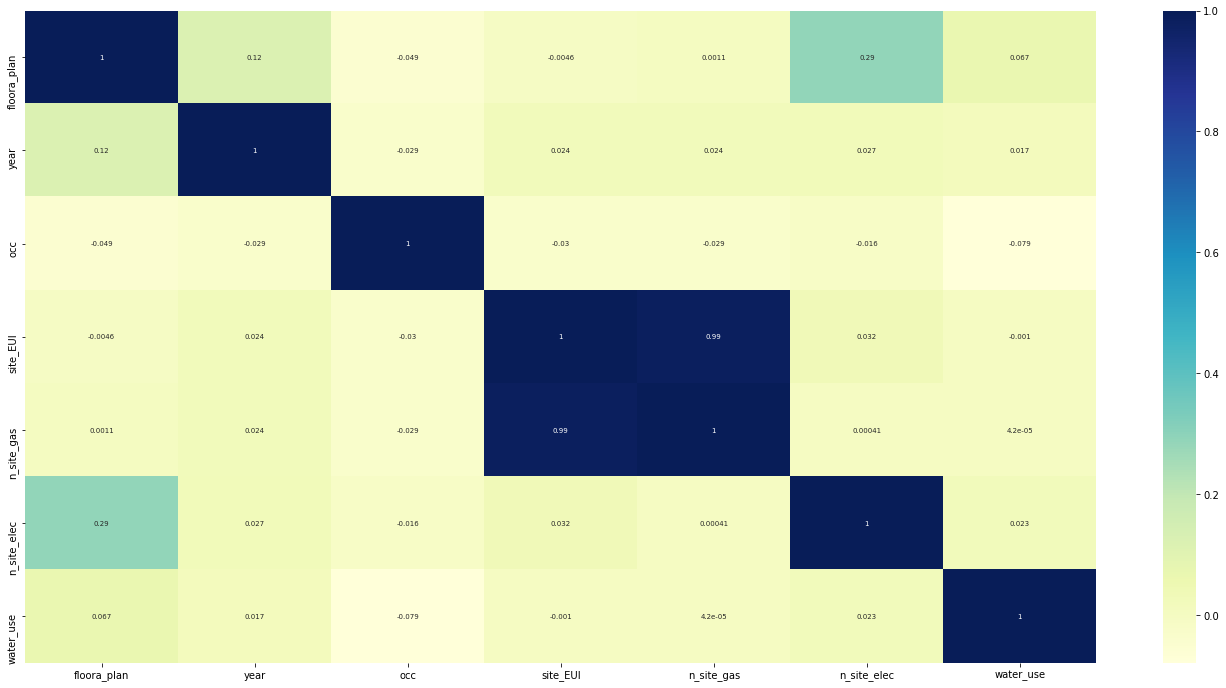

In [701]:
plt.figure(figsize=(24,12))

sns.heatmap(building.corr(), annot=True, annot_kws={"size": 7}, cmap='YlGnBu')
# plt.show()

#### Distributions
___

In [702]:
# sns.distplot(building['site_EUI'], kde=False, bins=50)

In [703]:
# sns.pairplot(building, palette='coolwarm')

In [704]:
# sns.jointplot(x='n_site_elec', y='site_EUI', data=building, kind='reg')

#### Handle Dummy's
___

In [705]:
dummy = pd.get_dummies(building['ptype'])

building = pd.concat([building, dummy], axis=1)

df_X = building.copy(deep=True)
df_X.drop(['site_EUI', 'ptype'],axis='columns', inplace=True)

df_Y = building['site_EUI'].copy(deep=True)

In [706]:
#pd.get_dummies(building['ptype']).values[:,1:].shape

In [707]:
df_X.columns

Index(['floora_plan', 'year', 'occ', 'n_site_gas', 'n_site_elec', 'water_use',
       'Education', 'Entertainment', 'Facility', 'Food Service',
       'General Medical', 'Hotel', 'Multifamily', 'Office', 'Other', 'Parking',
       'Retail'],
      dtype='object')

#### Define X, Y variables
___

In [708]:
#x_columns = ['ptype', 'floor_area', 'build_year', 'occupy', 'star', 'ngas', 'water_use']
#y_columns = ['site_eui']

#X = building[x_columns].values
#Y = building[y_columns].values

X = df_X.values
Y = df_Y.values

In [709]:
print (X.shape, Y.shape)

(6449, 17) (6449,)


In [710]:
print (X)

[[4.12503e+05 1.90300e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.67517e+05 1.95000e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [3.21464e+05 1.93900e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [9.35000e+04 1.92600e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.07150e+04 1.92800e+03 1.00000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.35370e+04 2.00600e+03 9.50000e+01 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]


#### Label Encoding
___

In [711]:
#building['ptype'].unique()

In [712]:
#building['ptype'].nunique()

In [713]:
#label_encoder_ptype = LabelEncoder()
#X[:, 0] = label_encoder_ptype.fit_transform(building['ptype'])


#label_hotencoder_ptype = OneHotEncoder(categorical_features = [0])
#X = label_hotencoder_ptype.fit_transform(X).toarray()

#print(X)

#np.unique(label_encoder_ptype.fit_transform(building['ptype']))
#label_hotencoder_ptype.fit_transform(X)


### Avoiding the Dummy Variable Trap
____


In [714]:
X.shape

(6449, 17)

In [715]:
#X = X[:, 1:]

X = X[:,:-1]

X.shape

(6449, 16)

#### Split dataset (TRAIN/TEST) data
____

In [716]:
#no floor plan
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 10)
#with floor plan
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,random_state = 89)


In [717]:
regressor = LinearRegression() 
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Fitting Simple Linear Regression to the Training Set
_____

In [718]:
y_prediction = regressor.predict(X_test)

#### Real x Predict
_____

In [719]:
final_df = pd.DataFrame({
    'Real' : Y_test,
    'Predict' : y_prediction

})

In [720]:
final_df.to_csv(r'LR_withFloorPlan_Real_Prediction.csv',index=False)

#### Model Score
__________

In [721]:
print(f"Training Data Score: {regressor.score(X_train, Y_train)}")
print(f"Testing Data Score: {regressor.score(X_test, Y_test)}")

Training Data Score: 0.975863921094919
Testing Data Score: 0.3523174705792973


### Correlation
___

In [722]:
print (regressor.intercept_)

-129.74246335889865


In [723]:
regressor.coef_

array([-1.09323409e-03,  3.79911094e-01, -5.64489369e+00,  1.62600564e-03,
        4.37843243e-05, -4.70002421e-05,  4.51875005e+01,  4.77753123e+01,
        1.40947248e+01,  6.25277607e-13, -2.35814086e+02,  5.87718893e+02,
        6.15865328e+01,  7.88605385e+01, -1.85867761e+01,  2.83810556e+02])

In [724]:
# coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
# coeff_df

### Backward Elimination
___

In [725]:
X = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis =1)

In [726]:
X_optimized = X[:, [0, 1, 2, 3, 4, 5]]

significante_level = 0.05

regressor_OLS = sm.OLS(endog = Y, exog = X_optimized).fit()